<a href="https://colab.research.google.com/github/M-pranav-7/Image_classifiction_ML/blob/main/Image_Classifiction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader


In [2]:
!mkdir images


In [19]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://getwallpapers.com/wallpaper/full/1/e/a/820310-sunflowers-wallpaper-1920x1200-4k.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.elegantweddinginvites.com/wedding-blog/wp-content/uploads/2015/12/inexpensive-wedding-centerpiece-ideas-with-sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/fd/69/16/fd691631aaae94ba5ab1104182f7d48f.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://ohbestdayever.com/wp-content/uploads/2017/12/royal-blue-and-sunflower-yellow-wedding-centerpiece-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://24.media.tumblr.com/tumblr_m62rnbWYCG1r7pl96o1_500.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://ohbestdayever.com/wp-content/uploads/2017/12/rustic-chic-sunflower-wedding-centerpiece-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://getwa

In [4]:
downloader.download("rugby ball leather",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://cdn.notonthehighstreet.com/system/product_images/images/000/393/351/original_CF016852.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-heritage-leather-rugby-ball-1_1024x1024.jpg?v=1550134680
[%] File Downloaded !

[%] Downloading Image #3 from http://www.john-woodbridge.com/1024-tm_thickbox_default/1910s-basketball.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images.antiquesatlas.com/dealer-stock-images/puckeringsantiques/Antique_Novelty_Travel_Inkwell_as584a1568z-3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.john-woodbridge.com/1536-tm_large_default/leather-vintage-football-allen-1938.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.thinglink.me/api/image/586569159714799617/1240/10/scaletowidth
[%] File Downloaded !

[%] Downloading Image #7 from h

In [24]:
downloader.download("ice cream cone",limit=30,output_dir="images",adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://i.ytimg.com/vi/2H8p2Dxpu_s/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://how-to-draw-funny-cartoons.com/image-files/xcartoon-ice-cream-1.gif.pagespeed.ic.YcMziLja08.png
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Crystalcaveformations01.jpg/1200px-Crystalcaveformations01.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://thefancy-media-ec3.thefancy.com/original/20110902/260782783_854ed8477672.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://s3-media1.fl.yelpcdn.com/bphoto/XhI0s6B5oKizBX2RcOmHWw/o.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.collegexpress.com/blog/chocolate.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://img.shockblast.net/2012/03/ShockBlast-Mary-Ellen-Johnson-Ice_Cream.jpg
[%] File Downloaded !

[%] Downlo

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['ice cream cone','pretty sunflower','rugby ball leather']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [29]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://www.gardeningknowhow.com/wp-content/uploads/2020/11/yellow-sunflower-field-400x300.jpg
(300, 400, 3)
 PREDICTED OUTPUT: pretty sunflower


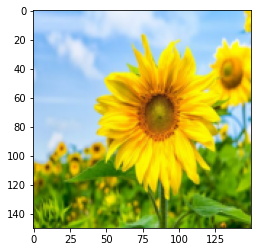

In [33]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [34]:
!pip install streamlit

!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.2MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 112kB 41.3MB/s 
     |████████████████████████████████| 163kB 38.4MB/s 
     |████████████████████████████████| 4.2MB 36.1MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 122kB 40.9MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=bace5e6482894034a8df2148d049ab96c221f51c7531bbd71b611009fa0360be
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=7d59b739fff28b6e7f91170d8b0deb96ed26f8fbd485191e64e2ed640429c8e3
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [37]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['ice cream cone','pretty sunflower','rugby ball leather']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py


In [36]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://d08c0e519d9e.ngrok.io'